# Benchmark case: Cyclic dominance with three mutants.
In this notebook, we study a the special of threefold cyclic dominance, also known as rock-paper-scissor dynamics. It involves three lineages and includes their mutual competition. Competition is parameterized by the competition matrix $C$. The matrix element $C_{ij}$ determines the rate at which cells of type $i$ are defeated by cells of type $j$. Cyclic dominance comes into play if the competition matrix is balanced out in such a way that a given lineage is dominant against one of the other two lineages and dominated by the other one. A typical heatmap of this case is shown below:
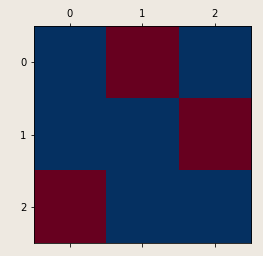
Red color indicates large matrix elements, blue color indicates small matrix elements. Keep in mind that the first index enumerates rows and increases from top to bottom, whereas the second index enumerates columns and increases from left to right.

## Imports

In [2]:
import multiprocess as mp
import os, shutil, numpy
from matplotlib import pyplot
import math

In [3]:
from GillespieSimulator.GillespieEngine import GillespieEngine
from GillespieSimulator.Parameters import Parameters

## Setup the parameters 
We initialize the competition matrix as $C_{ij}\equiv 0$ and later inject the equilibrated matrix elements. We resort to this hack because the competition matrix is no accessible through the public API of the `GillespieEngine`.

In [4]:
parameters = Parameters(max_time=100,
         max_population_size=None,
         division_rate=1.0,
         division_rate_fwhm=0.0,
         mutation_probability=0.0,
         death_rate=0.0,
         death_rate_fwhm=0.0,
         pdf_mean=0.00,
         pdf_rms=.000,
         barcode_size=0,
         genome_size=1,
         carrying_capacity=100,
         theta=0,
        )
         

### Simulation output

In [5]:
output_dir = 'cyclic_dependency'

### Define a function that performs a simulation run. 
Inject the competition matrix. Each lineage is **dominant** against one other lineage and **dominated** by another one. We scale the coefficients by a factor $\propto \left|C\right|_{\mathrm{max}}^{2}$ so that competition only becomes important near carrying capacity. $\left|.\right|_{\mathrm{max}}$ is the maximum norm.

In [6]:
def run_engine(run_number):
    # print("Setting seed")
    seed = run_number
    numpy.random.seed(seed)
    
    # print("Setting up engine.")
    engine = GillespieEngine(parameters=parameters,
                             population=[10, 10, 10],
                             outdir=os.path.join(output_dir,'gillespie_run_out_{0:04d}'.format(run_number))
                            )
    # Inject the competition matrix.
    Cij_dom = 20./parameters.carrying_capacity**2
    engine._GillespieEngine__competition_matrix = numpy.zeros((3,3))
    engine._GillespieEngine__competition_matrix[0,1] = \
    engine._GillespieEngine__competition_matrix[1,2] = \
    engine._GillespieEngine__competition_matrix[2,0] = Cij_dom
    # print("Running the engine")
    engine.run(snapshot_interval=1)
    
    print("Simulation data was written to {}.".format(engine.outdir))

## Setup the process pool

### Determine number of processes available to this run.

In [7]:
number_of_cpus = mp.cpu_count()
print("There are {} CPUs on this system.".format(number_of_cpus))

There are 48 CPUs on this system.


### Set number of runs 

In [8]:
number_of_runs = 128
runs = range(number_of_runs)

### Set the number of cpus to use in this run.
This number should be equal or less to the number of simulations to run to avoid idling processes. It's ok to oversubscribe the CPU that is to make a pool that has more processes than there are CPU cores.

In [9]:
pool_size = min(number_of_runs, number_of_cpus)

In [10]:
if os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
# os.mkdir(output_dir)

In [11]:
# Run one simulation (e.g. for testing purposes)
run_engine(number_of_runs)

Simulation data was written to cyclic_dependency/gillespie_run_out_0128.


In [12]:
# Run the pool of simulations in parallel.
with mp.Pool(pool_size) as pool:

### We use the `imap_unordered` method of `Pool` to take advantage of the `chunksize` parameter, which in the case of many long runs reduces the memory consumption. 
    pool.imap_unordered(run_engine, runs, chunksize=1)
    pool.close()
    pool.join()

Simulation data was written to cyclic_dependency/gillespie_run_out_0034.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0002.
Simulation data was written to cyclic_dependency/gillespie_run_out_0000.Simulation data was written to cyclic_dependency/gillespie_run_out_0023.

Simulation data was written to cyclic_dependency/gillespie_run_out_0013.

/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum



Simulation data was written to cyclic_dependency/gillespie_run_out_0018.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0047.
Simulation data was written to cyclic_dependency/gillespie_run_out_0038.
Simulation data was written to cyclic_dependency/gillespie_run_out_0020.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0014.
Simulation data was written to cyclic_dependency/gillespie_run_out_0008.
Simulation data was written to cyclic_dependency/gillespie_run_out_0015.
Simulation data was written to cyclic_dependency/gillespie_run_out_0046.
Simulation data was written to cyclic_dependency/gillespie_run_out_0033.Simulation data was written to cyclic_dependency/gillespie_run_out_0021.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum



Simulation data was written to cyclic_dependency/gillespie_run_out_0039.Simulation data was written to cyclic_dependency/gillespie_run_out_0045.

Simulation data was written to cyclic_dependency/gillespie_run_out_0040.
Simulation data was written to cyclic_dependency/gillespie_run_out_0025.
Simulation data was written to cyclic_dependency/gillespie_run_out_0024.
Simulation data was written to cyclic_dependency/gillespie_run_out_0022.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0006.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0004.
Simulation data was written to cyclic_dependency/gillespie_run_out_0029.
Simulation data was written to cyclic_dependency/gillespie_run_out_0037.Simulation data was written to cyclic_dependency/gillespie_run_out_0030.

Simulation data was written to cyclic_dependency/gillespie_run_out_0009.
Simulation data was written to cyclic_dependency/gillespie_run_out_0005.
Simulation data was written to cyclic_dependency/gillespie_run_out_0028.
Simulation data was written to cyclic_dependency/gillespie_run_out_0044.
Simulation data was written to cyclic_dependency/gillespie_run_out_0010.Simulation data was written to cyclic_dependency/gillespie_run_out_0032.

Simulation data was written to cyclic_dependency/gillespie_run_out_0041.
Simulation data was written to cyclic_dependency/gillespie_run_out_0001.
Simulation data was written to cyclic_dependency/gillespie_run_out_0026.
Simulation data was written to cyclic_dependency/gi

/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0051.
Simulation data was written to cyclic_dependency/gillespie_run_out_0056.
Simulation data was written to cyclic_dependency/gillespie_run_out_0058.
Simulation data was written to cyclic_dependency/gillespie_run_out_0053.
Simulation data was written to cyclic_dependency/gillespie_run_out_0049.
Simulation data was written to cyclic_dependency/gillespie_run_out_0069.
Simulation data was written to cyclic_dependency/gillespie_run_out_0063.
Simulation data was written to cyclic_dependency/gillespie_run_out_0061.
Simulation data was written to cyclic_dependency/gillespie_run_out_0052.
Simulation data was written to cyclic_dependency/gillespie_run_out_0070.
Simulation data was written to cyclic_dependency/gillespie_run_out_0064.
Simulation data was written to cyclic_dependency/gillespie_run_out_0055.
Simulation data was written to cyclic_dependency/gillespie_run_out_0050.
Simulation data was written to cyclic_dependency/gi

/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0091.
Simulation data was written to cyclic_dependency/gillespie_run_out_0060.
Simulation data was written to cyclic_dependency/gillespie_run_out_0062.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0084.
Simulation data was written to cyclic_dependency/gillespie_run_out_0093.
Simulation data was written to cyclic_dependency/gillespie_run_out_0065.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0074.
Simulation data was written to cyclic_dependency/gillespie_run_out_0068.
Simulation data was written to cyclic_dependency/gillespie_run_out_0086.
Simulation data was written to cyclic_dependency/gillespie_run_out_0075.
Simulation data was written to cyclic_dependency/gillespie_run_out_0077.
Simulation data was written to cyclic_dependency/gillespie_run_out_0085.
Simulation data was written to cyclic_dependency/gillespie_run_out_0076.
Simulation data was written to cyclic_dependency/gillespie_run_out_0090.
Simulation data was written to cyclic_dependency/gillespie_run_out_0096.
Simulation data was written to cyclic_dependency/gillespie_run_out_0072.
Simulation data was written to cyclic_dependency/gillespie_run_out_0083.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0089.Simulation data was written to cyclic_dependency/gillespie_run_out_0087.

Simulation data was written to cyclic_dependency/gillespie_run_out_0080.
Simulation data was written to cyclic_dependency/gillespie_run_out_0071.
Simulation data was written to cyclic_dependency/gillespie_run_out_0079.
Simulation data was written to cyclic_dependency/gillespie_run_out_0095.
Simulation data was written to cyclic_dependency/gillespie_run_out_0066.
Simulation data was written to cyclic_dependency/gillespie_run_out_0100.
Simulation data was written to cyclic_dependency/gillespie_run_out_0092.
Simulation data was written to cyclic_dependency/gillespie_run_out_0078.
Simulation data was written to cyclic_dependency/gillespie_run_out_0094.
Simulation data was written to cyclic_dependency/gillespie_run_out_0088.


/opt/anaconda3/envs/rq/lib/python3.8/site-packages/GillespieSimulator/GillespieEngine.py:276: RuntimeWarning: divide by zero encountered in double_scalars
  tau = numpy.log(1. / r1) / conditional_sum


Simulation data was written to cyclic_dependency/gillespie_run_out_0099.
Simulation data was written to cyclic_dependency/gillespie_run_out_0082.
Simulation data was written to cyclic_dependency/gillespie_run_out_0097.
Simulation data was written to cyclic_dependency/gillespie_run_out_0103.
Simulation data was written to cyclic_dependency/gillespie_run_out_0105.
Simulation data was written to cyclic_dependency/gillespie_run_out_0107.
Simulation data was written to cyclic_dependency/gillespie_run_out_0098.
Simulation data was written to cyclic_dependency/gillespie_run_out_0111.
Simulation data was written to cyclic_dependency/gillespie_run_out_0101.
Simulation data was written to cyclic_dependency/gillespie_run_out_0118.
Simulation data was written to cyclic_dependency/gillespie_run_out_0117.
Simulation data was written to cyclic_dependency/gillespie_run_out_0108.
Simulation data was written to cyclic_dependency/gillespie_run_out_0102.
Simulation data was written to cyclic_dependency/gi

## Visualize results
Here we are only interested in those runs in which all three lineages survived with high abundance until the end of the simulation. We filter these runs and then visualise the interesting cases using the interactive tool.

In [13]:
from GillespieSimulator.analysis import *

In [14]:
runs = load_runs([os.path.join(output_dir,d) for d in os.listdir(output_dir)])

### Filter out those runs with 3 surviving lineages 

In [15]:
# Make dictionary {run: mutant} from output data.
all_mutants = dict([(run, mutants(runs[run])) for run in runs.keys()])

In [16]:
# Convert to multiindexed frame. Outer index is the run number.
all_mutants = pandas.concat(all_mutants.values(), axis=0, keys=all_mutants.keys(), names=['run'])

In [17]:
# Get the last snapshot in each run.
last_snapshots = all_mutants.groupby(axis=0, level=0).tail(1)
last_snapshots

Barcode ID              0    1    2
Mutant ID               0    0    0
run time (generations)             
0   100.053040          1   90    6
1   115.817854          1    0   98
2   103.283639          0   97    2
3   100.535923          0   70   27
4   100.260255          6   93    0
...                    ..  ...  ...
124 101.089082          0   97    2
125 inf                 1    0  100
126 102.522096          0   96    3
127 inf                 1    0  100
128 inf                 1  100    0

[129 rows x 3 columns]

In [18]:
# Calculate the mean over runs.
mean = last_snapshots.mean(axis=1)

In [19]:
mean

run  time (generations)
0    100.053040            32.333333
1    115.817854            33.000000
2    103.283639            33.000000
3    100.535923            32.333333
4    100.260255            33.000000
                             ...    
124  101.089082            33.000000
125  inf                   33.666667
126  102.522096            33.000000
127  inf                   33.666667
128  inf                   33.666667
Length: 129, dtype: float64

In [20]:
# Take the abs of distance to mean.
for c in last_snapshots.columns:
    last_snapshots.loc[:,c] = abs(last_snapshots.loc[:,c] - mean)

/opt/anaconda3/envs/rq/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [21]:
last_snapshots

Barcode ID                    0        1        2
Mutant ID                     0        0        0
run time (generations)                           
0   100.053040          31.3333  57.6667  26.3333
1   115.817854               32       33       65
2   103.283639               33       64       31
3   100.535923          32.3333  37.6667  5.33333
4   100.260255               27       60       33
...                         ...      ...      ...
124 101.089082               33       64       31
125 inf                 32.6667  33.6667  66.3333
126 102.522096               33       63       30
127 inf                 32.6667  33.6667  66.3333
128 inf                 32.6667  66.3333  33.6667

[129 rows x 3 columns]

In [22]:
# Get the indices of rows in which all three final cell counts lie close together (max distance < 10)
candidate_index = [i[0] for i in last_snapshots[last_snapshots < 10].dropna().index]

In [23]:
candidate_index

[78]

In [24]:
# Take out the runs corresponding to candidate run indices. 
# Put them in a dict to suite as input to the interactive vis.
candidate_runs = {i:runs[k] for i,k in enumerate(candidate_index)}

## Visualize all runs where all three lineages differ by less than 10 in the final snapshot. 

In [25]:
display(interactive_plot_widget(candidate_runs))

For the static version of this notebook, here is a screenshot of the interactive version:
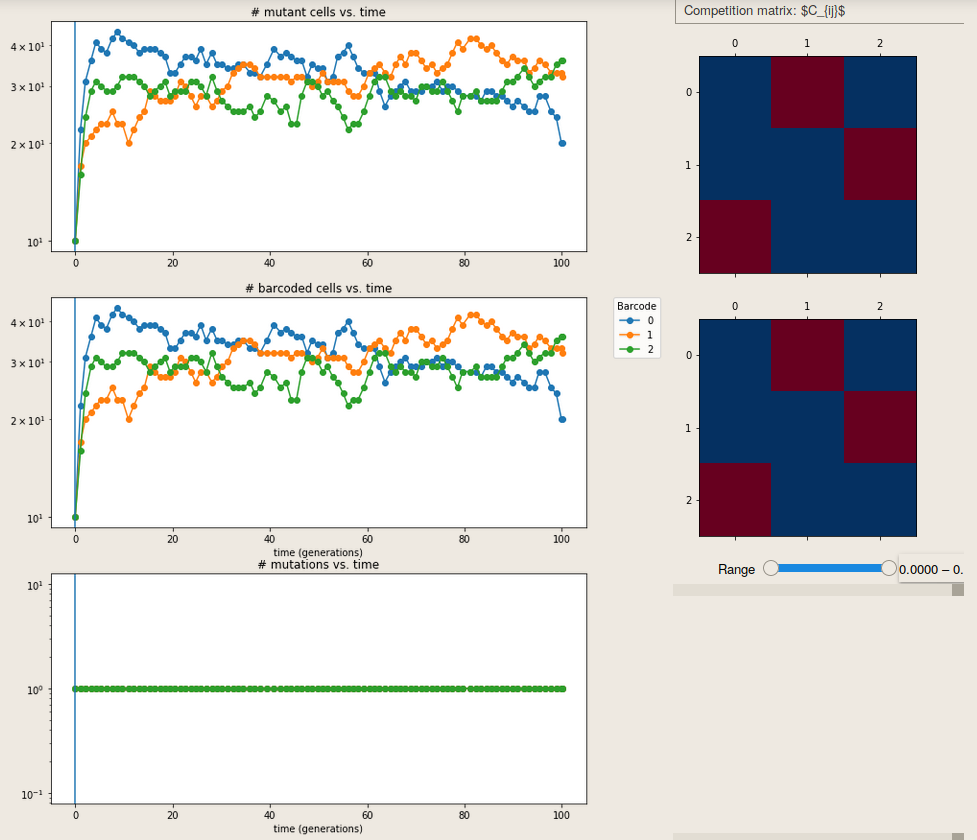


An interactive version of this notebook is served at https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.gwdg.de%2Fmpievolbio-scicomp%2Fgillespiesimulator.git/master?filepath=doc%2Fsource%2Finclude%2Fnotebooks%2FCyclicDominance.ipynb